# Imports de paquets

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Jeu de données "PIB par habitant"

In [37]:
df = pd.read_csv('PIB par habitant.csv',
                header=2)

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 62 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              135 non-null float64
1961              135 non-null float64
1962              137 non-null float64
1963              137 non-null float64
1964              137 non-null float64
1965              146 non-null float64
1966              147 non-null float64
1967              150 non-null float64
1968              154 non-null float64
1969              154 non-null float64
1970              163 non-null float64
1971              165 non-null float64
1972              165 non-null float64
1973              165 non-null float64
1974              165 non-null float64
1975              168 non-null float64
1976              169 non-null float64
1977              172 non-null float64
1978              171 non-null float64
19

Country Name Country Code                Indicator Name  Indicator Code  \
0        Aruba          ABW  GDP per capita (current US$)  NY.GDP.PCAP.CD   
1  Afghanistan          AFG  GDP per capita (current US$)  NY.GDP.PCAP.CD   
2       Angola          AGO  GDP per capita (current US$)  NY.GDP.PCAP.CD   
3      Albania          ALB  GDP per capita (current US$)  NY.GDP.PCAP.CD   
4      Andorra          AND  GDP per capita (current US$)  NY.GDP.PCAP.CD   

        1960       1961       1962       1963       1964        1965  \
0        NaN        NaN        NaN        NaN        NaN         NaN   
1  59.787681  59.890037  58.505995  78.802587  82.231394  101.321627   
2        NaN        NaN        NaN        NaN        NaN         NaN   
3        NaN        NaN        NaN        NaN        NaN         NaN   
4        NaN        NaN        NaN        NaN        NaN         NaN   

      ...               2008          2009          2010          2011  \
0     ...       27549.889422  24640.421244  24289.141516  25353.787545   
1     ...         384.131681    458.955782    569.940729    622.379654   
2     ...        4242.363062   3678.947654   3886.479354   4744.987629   
3     ...        4370.539647   4114.136545   4094.358832   4437.811999   
4     ...       46734.268282  42704.019427  39641.746008  41627.462998   

           2012          2013         2014         2015  2016  Unnamed: 61  
0           NaN           NaN          NaN          NaN   NaN          NaN  
1    690.842629    653.347488   633.947864   594.323081   NaN          NaN  
2   5086.848426   5327.148892  5232.762300  4101.472152   NaN          NaN  
3   4247.839852   4412.345578  4568.568827  3945.217582   NaN          NaN  
4  39666.043036  42804.202635          NaN          NaN   NaN          NaN  

[5 rows x 62 columns]

Commes certaines colonnes me sont inutiles, je les enlève.

In [38]:
df.drop(['Indicator Name', 'Indicator Code'], axis='columns', inplace=True)

df.head()

Country Name Country Code       1960       1961       1962       1963  \
0        Aruba          ABW        NaN        NaN        NaN        NaN   
1  Afghanistan          AFG  59.787681  59.890037  58.505995  78.802587   
2       Angola          AGO        NaN        NaN        NaN        NaN   
3      Albania          ALB        NaN        NaN        NaN        NaN   
4      Andorra          AND        NaN        NaN        NaN        NaN   

        1964        1965        1966        1967     ...               2008  \
0        NaN         NaN         NaN         NaN     ...       27549.889422   
1  82.231394  101.321627  137.946783  161.384702     ...         384.131681   
2        NaN         NaN         NaN         NaN     ...        4242.363062   
3        NaN         NaN         NaN         NaN     ...        4370.539647   
4        NaN         NaN         NaN         NaN     ...       46734.268282   

           2009          2010          2011          2012          2013  \
0  24640.421244  24289.141516  25353.787545           NaN           NaN   
1    458.955782    569.940729    622.379654    690.842629    653.347488   
2   3678.947654   3886.479354   4744.987629   5086.848426   5327.148892   
3   4114.136545   4094.358832   4437.811999   4247.839852   4412.345578   
4  42704.019427  39641.746008  41627.462998  39666.043036  42804.202635   

          2014         2015  2016  Unnamed: 61  
0          NaN          NaN   NaN          NaN  
1   633.947864   594.323081   NaN          NaN  
2  5232.762300  4101.472152   NaN          NaN  
3  4568.568827  3945.217582   NaN          NaN  
4          NaN          NaN   NaN          NaN  

[5 rows x 60 columns]

In [39]:
df = pd.melt(df, id_vars=['Country Name', 'Country Code'])

df.columns = ['Pays', 'Code', 'Année', 'PIB par habitant']

df.head()

Pays Code Année  PIB par habitant
0        Aruba  ABW  1960               NaN
1  Afghanistan  AFG  1960         59.787681
2       Angola  AGO  1960               NaN
3      Albania  ALB  1960               NaN
4      Andorra  AND  1960               NaN

In [40]:
plt.style.use('ggplot')

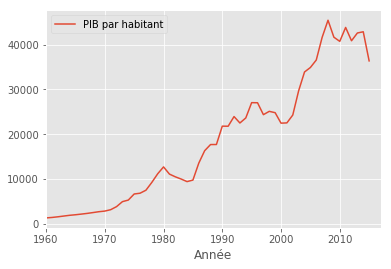

In [41]:
df.loc[df['Pays'] == 'France'].plot(kind='line', x='Année', y='PIB par habitant')

plt.show()

Et voici ma jolie vue. Regardez comme un crash semble arriver à chaque fois que l'Europe de l'Ouest rattrape les Etats-Unis !

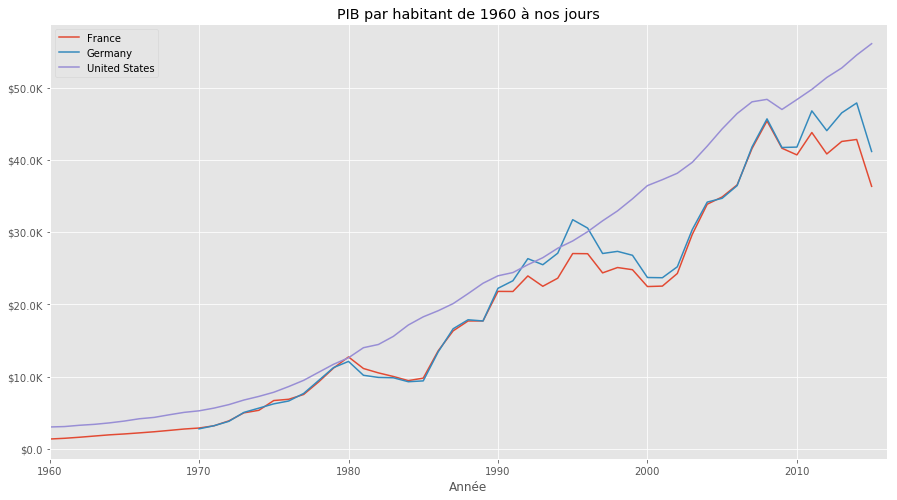

In [131]:
from matplotlib.ticker import FuncFormatter

def currency(x, pos):
    'The two args are the value and tick position'
    if x < 1e3:
        return '${:1.1f}'.format(x)
    elif x < 1e6:
        return '${:1.1f}K'.format(x / 1e3)
    else:
        return '${:1.1f}M'.format(x / 1e6)
    return x

fig, ax = plt.subplots(figsize=(15,8))
for pays in ['France', 'Germany', 'United States']:
    df.loc[df['Pays'] == pays].plot(kind='line', x='Année', y='PIB par habitant', ax=ax, label=pays)

ax.set(title='PIB par habitant de 1960 à nos jours', xlabel='Année', ylabel='')
formatter = FuncFormatter(currency)
ax.yaxis.set_major_formatter(formatter)
ax.legend().set_visible(True)

plt.show()

In [43]:
ind = df['Pays'].str.contains('F')

df.loc[ind].head()

Pays Code Année  PIB par habitant
17                              Burkina Faso  BFA  1960         68.424706
72  Fragile and conflict affected situations  FCS  1960               NaN
73                                   Finland  FIN  1960       1179.353011
74                                      Fiji  FJI  1960        285.544678
75                                    France  FRA  1960       1338.299606

# Population et espérance de vie

In [44]:
df_pop = pd.read_csv('Population totale.csv',
                header=2)

df_pop.drop(['Indicator Name', 'Indicator Code'], axis='columns', inplace=True)

df_pop = pd.melt(df_pop, id_vars=['Country Name', 'Country Code'])

df_pop.columns = ['Pays', 'Code', 'Année', 'Population']

df_pop.head()

Pays Code Année  Population
0        Aruba  ABW  1960     54208.0
1  Afghanistan  AFG  1960   8994793.0
2       Angola  AGO  1960   5270844.0
3      Albania  ALB  1960   1608800.0
4      Andorra  AND  1960     13414.0

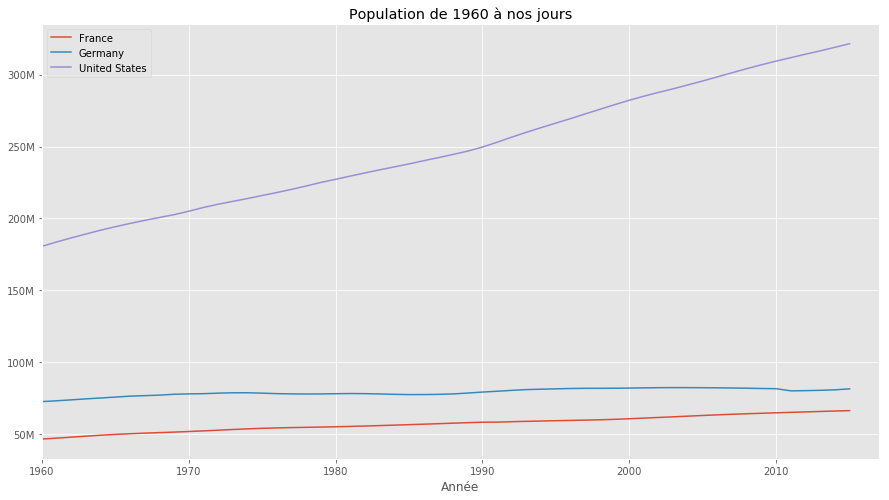

In [45]:
def millions(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '{:1.0f}M'.format(x*1e-6)
    return '{:1.0f}K'.format(x*1e-3)

fig, ax = plt.subplots(figsize=(15,8))
for pays in ['France', 'Germany', 'United States']:
    df_pop.loc[df['Pays'] == pays].plot(kind='line', x='Année', y='Population', ax=ax, label=pays)

ax.set(title='Population de 1960 à nos jours', xlabel='Année', ylabel='')
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
ax.legend().set_visible(True)

plt.show()

In [46]:
df_vie = pd.read_csv('Esperance de vie.csv',
                header=2)

df_vie.drop(['Indicator Name', 'Indicator Code'], axis='columns', inplace=True)

df_vie = pd.melt(df_vie, id_vars=['Country Name', 'Country Code'])

df_vie.columns = ['Pays', 'Code', 'Année', 'Espérance de vie']

df_vie.head()

Pays Code Année  Espérance de vie
0        Aruba  ABW  1960         65.569366
1  Afghanistan  AFG  1960         32.328512
2       Angola  AGO  1960         32.984829
3      Albania  ALB  1960         62.254366
4      Andorra  AND  1960               NaN

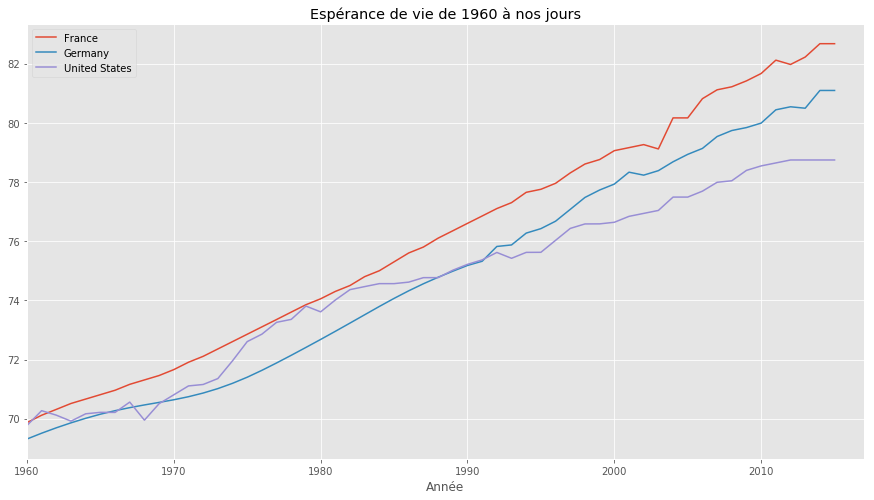

In [47]:
fig, ax = plt.subplots(figsize=(15,8))
for pays in ['France', 'Germany', 'United States']:
    df_vie.loc[df['Pays'] == pays].plot(kind='line', x='Année', y='Espérance de vie', ax=ax, label=pays)

ax.set(title='Espérance de vie de 1960 à nos jours', xlabel='Année', ylabel='')
ax.legend().set_visible(True)

plt.show()

# Comment comparer les trois ?

In [48]:
df_pib = df

In [49]:
df = pd.merge(
    left = df_pib,
    right = df_pop.drop(['Pays'], axis='columns'),
    on = ['Code', 'Année']
)

df.head()

Pays Code Année  PIB par habitant  Population
0        Aruba  ABW  1960               NaN     54208.0
1  Afghanistan  AFG  1960         59.787681   8994793.0
2       Angola  AGO  1960               NaN   5270844.0
3      Albania  ALB  1960               NaN   1608800.0
4      Andorra  AND  1960               NaN     13414.0

In [50]:
df = pd.merge(
    left = df,
    right = df_vie.drop(['Pays'], axis='columns'),
    on = ['Code', 'Année']
)

df.head()

Pays Code Année  PIB par habitant  Population  Espérance de vie
0        Aruba  ABW  1960               NaN     54208.0         65.569366
1  Afghanistan  AFG  1960         59.787681   8994793.0         32.328512
2       Angola  AGO  1960               NaN   5270844.0         32.984829
3      Albania  ALB  1960               NaN   1608800.0         62.254366
4      Andorra  AND  1960               NaN     13414.0               NaN

In [52]:
df = df[df['Année'] != 'Unnamed: 61']

df['Année'] = df['Année'].astype(int)

C:\Users\pierr\Anaconda3\lib\site-packages\pandas\core\ops.py:792: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [53]:
df_reg = pd.read_csv('Regions du monde.csv')[['ISO-alpha3 Code', 'Region Name']]

df_reg.columns = ['Code', 'Région']

df = pd.merge(
    left = df,
    right = df_reg,
    on = 'Code'
)

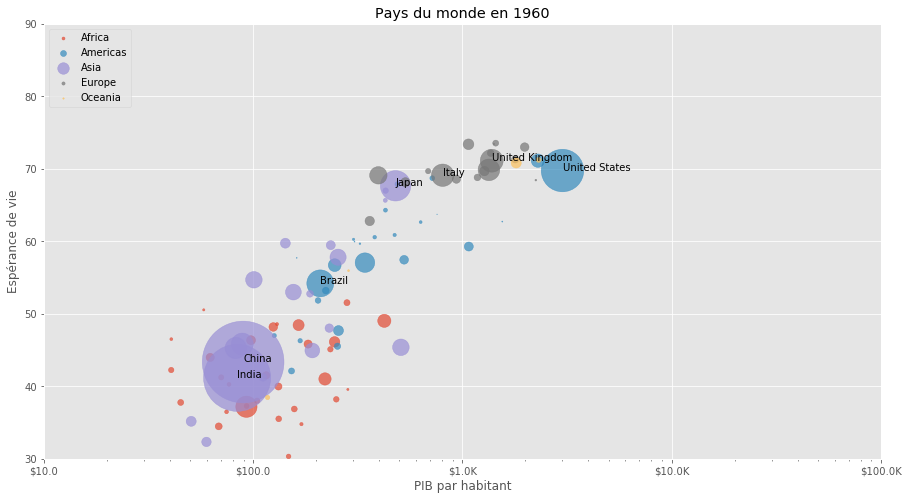

In [155]:
def pays_du_monde(year, save = False):
    fig, ax = plt.subplots(figsize = (15, 8))

    for name, group in df[df['Année'] == year].groupby('Région'):
        ax.scatter(
            group['PIB par habitant'],
            group['Espérance de vie'],
            s = group['Population'] / 1e5,
            alpha = 0.7,
            label = name
        )

    ax.set_title('Pays du monde en ' + str(year))
    ax.set_xlabel('PIB par habitant')
    ax.set_ylabel('Espérance de vie')
    ax.set_ylim(bottom = 30, top = 90)
    ax.set_xlim(xmin=10, xmax=1e5)
    ax.semilogx()
    ax.legend(markerscale = 0.2, loc = 'upper left')
    formatter = FuncFormatter(currency)
    ax.xaxis.set_major_formatter(formatter)

    for index, row in df[df['Année'] == year].sort_values(by = 'Population', ascending = False).head(10).iterrows():
        ax.annotate(row['Pays'], (row['PIB par habitant'], row['Espérance de vie']))

    if save:
        plt.savefig('Pays du monde en ' + str(year) + '.png')
        
    plt.show()
    

pays_du_monde(1960, save = True)

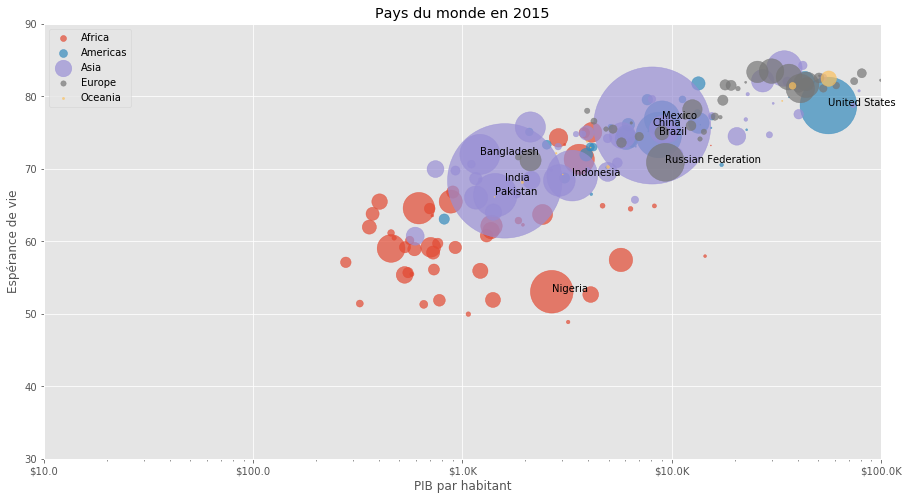

In [153]:
pays_du_monde(2015)

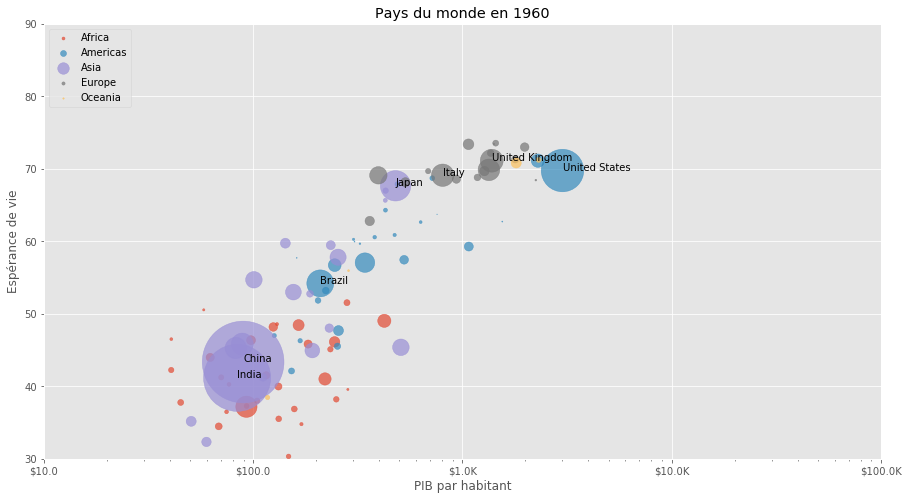

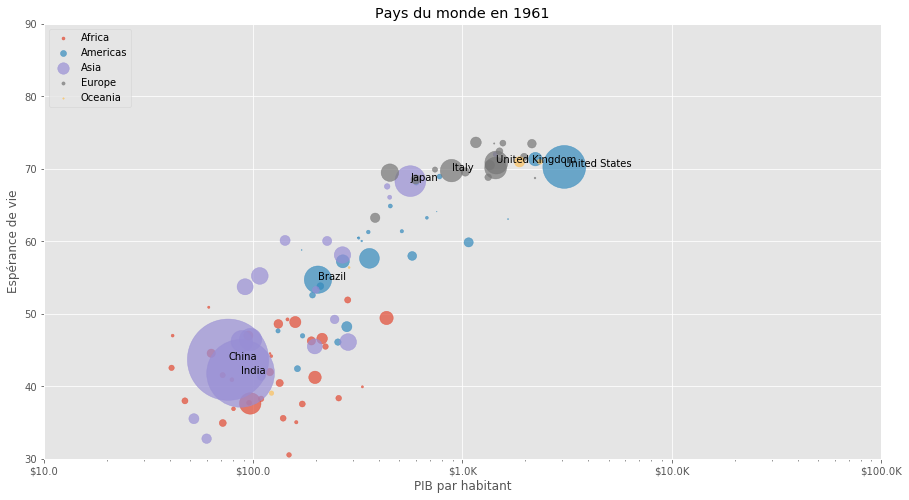

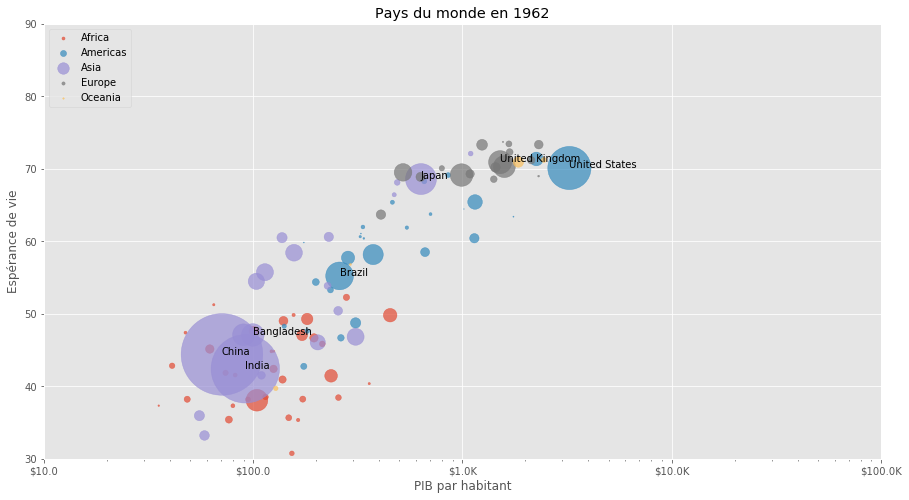

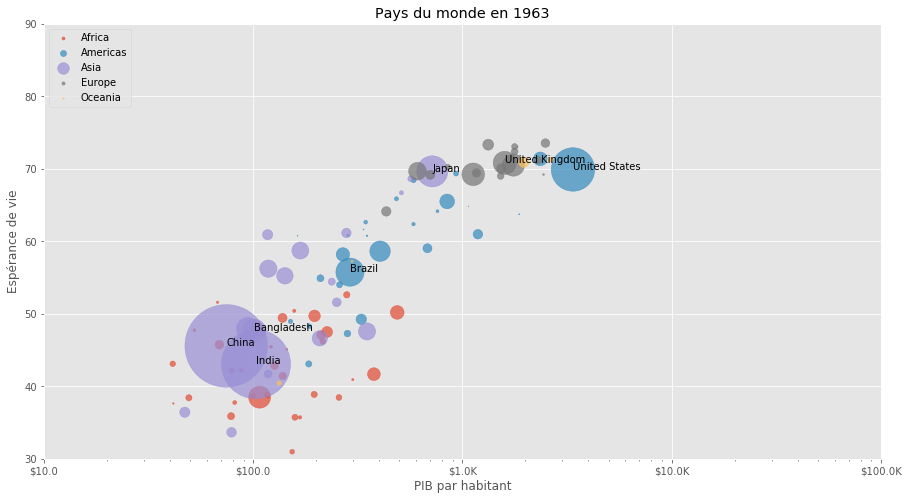

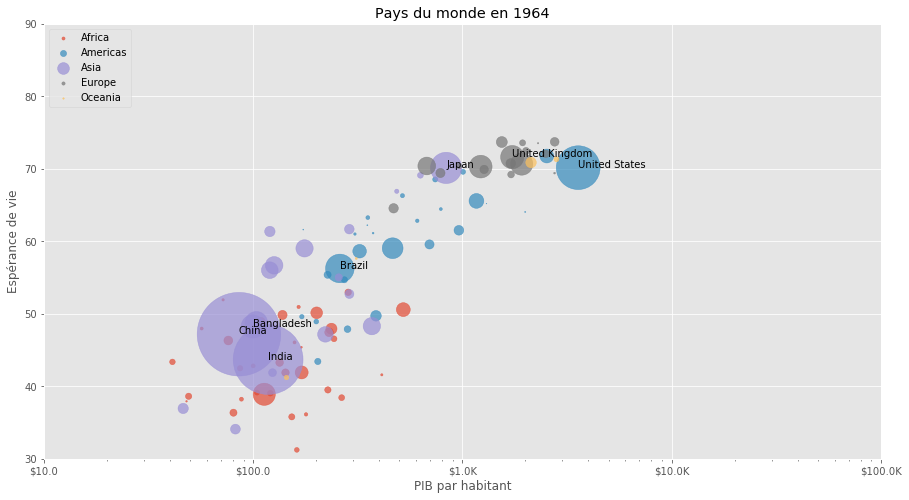

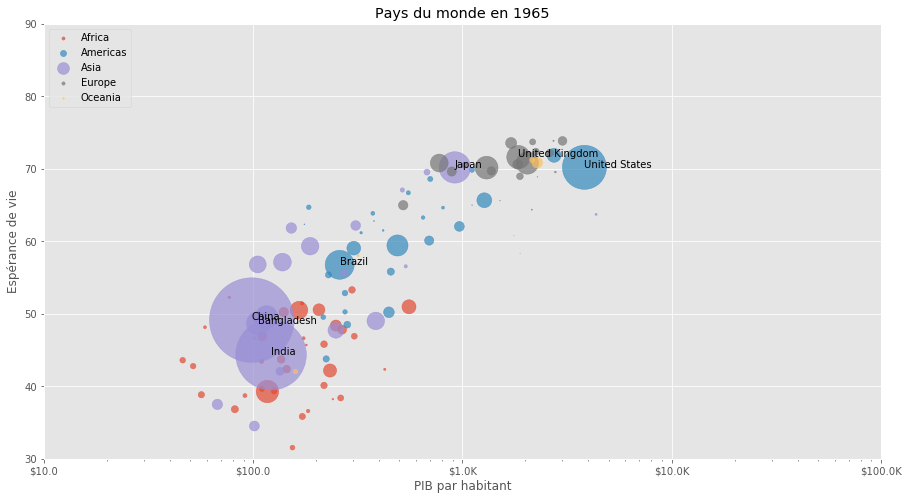

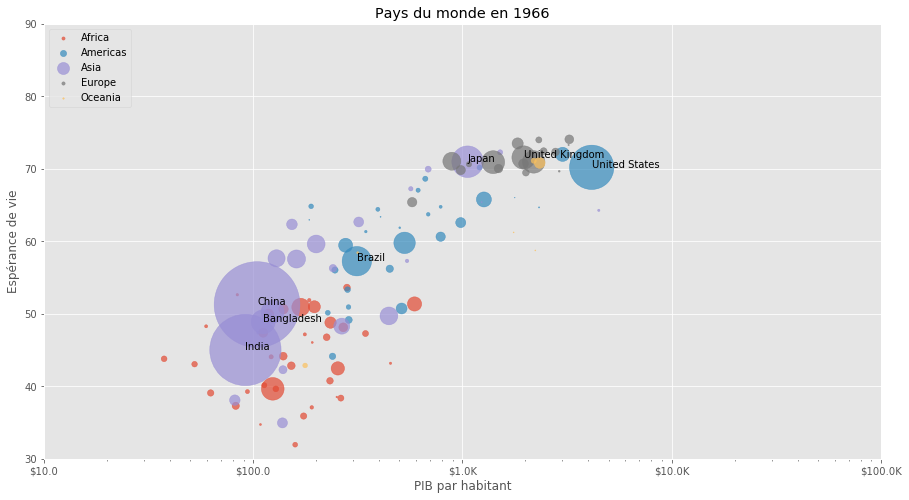

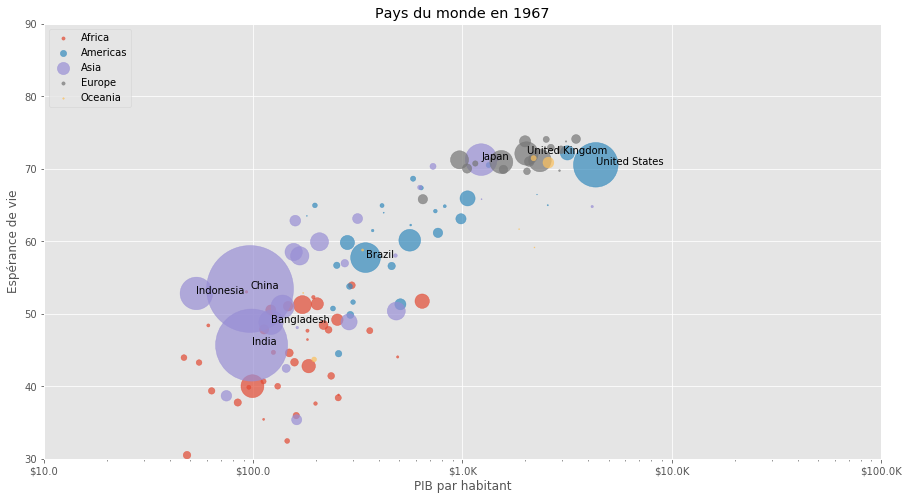

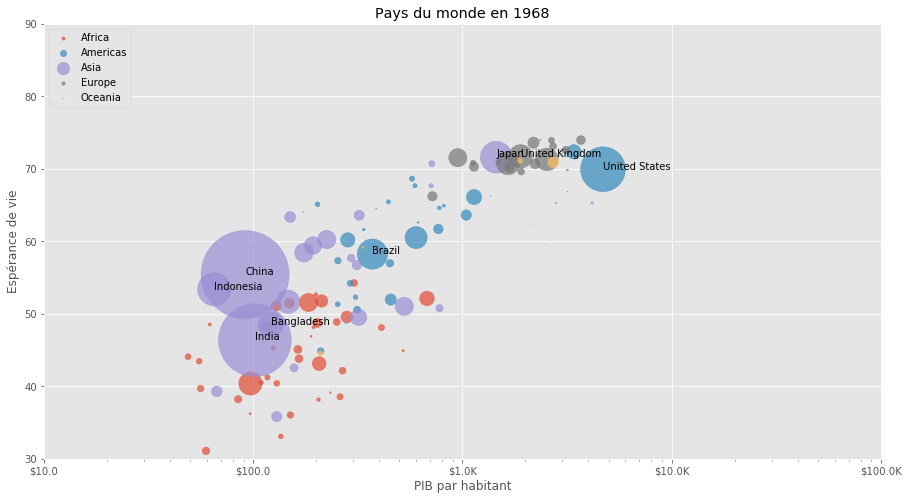

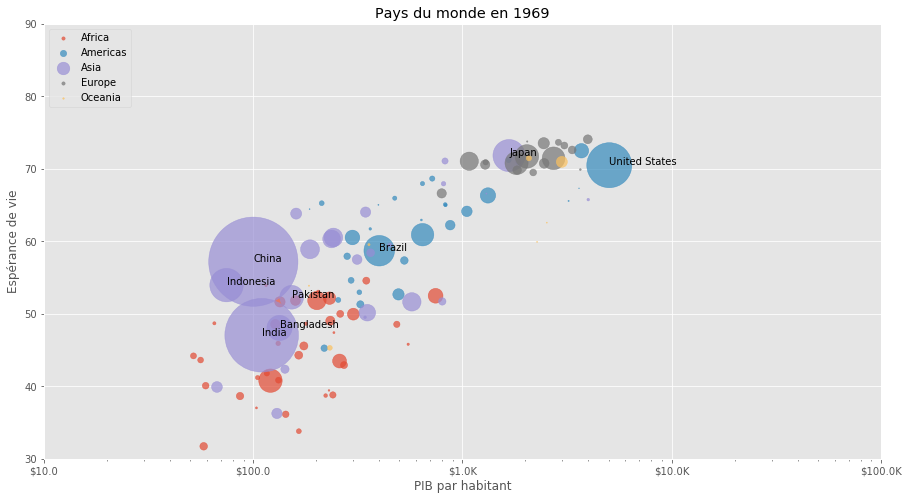

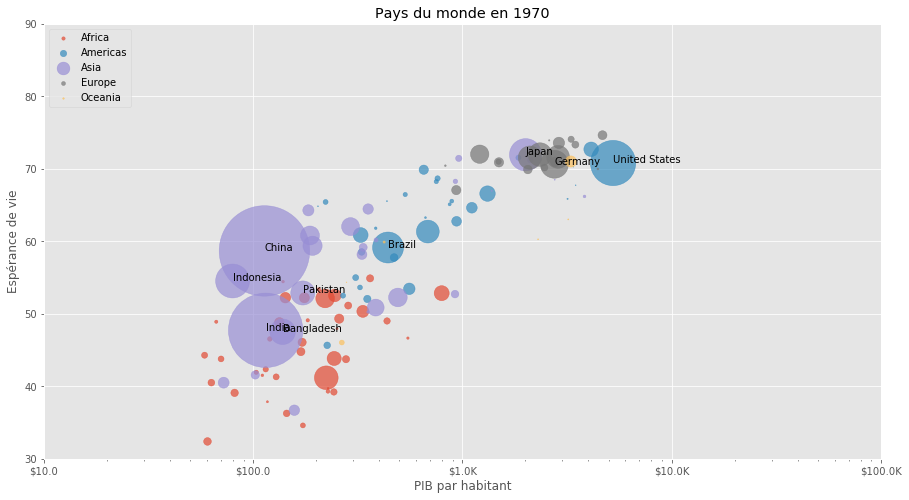

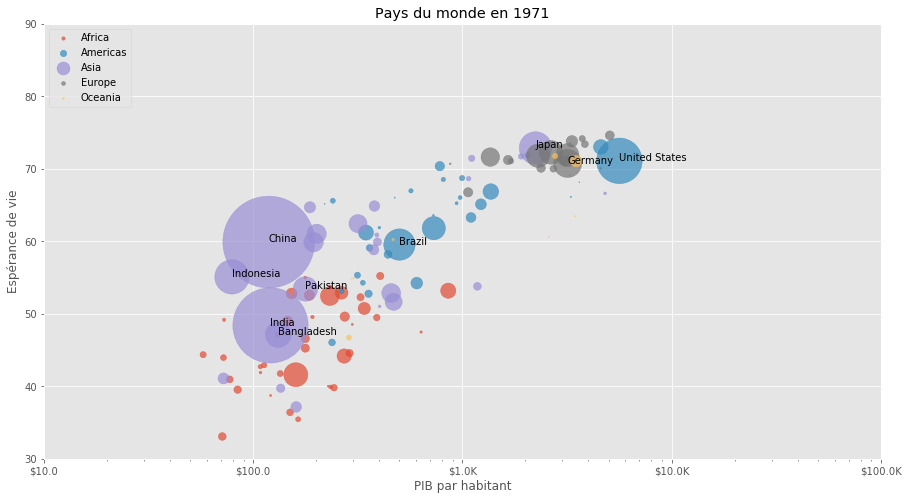

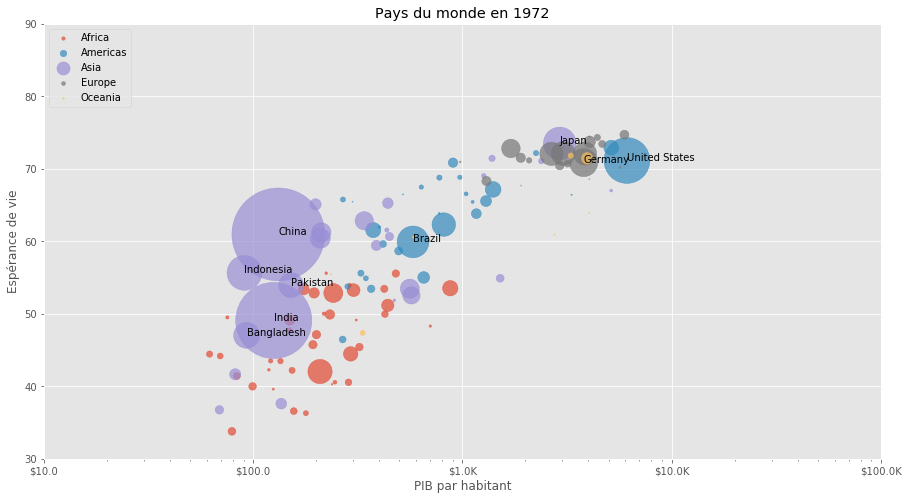

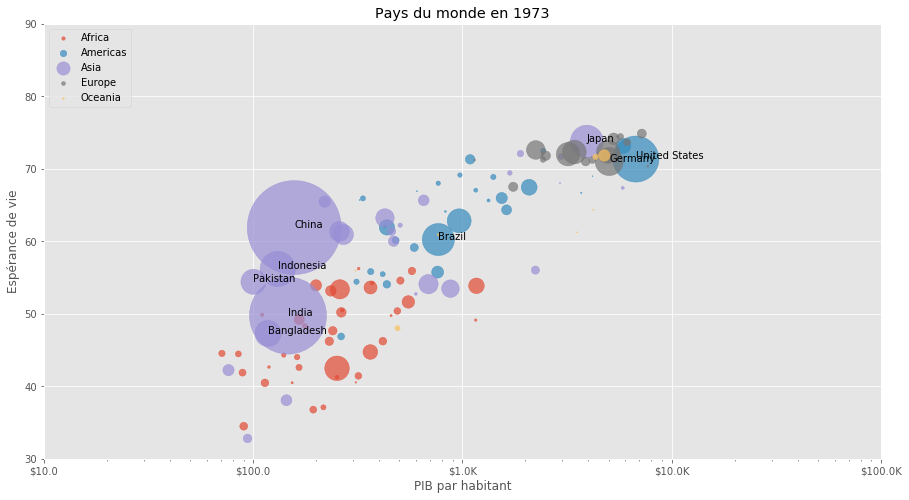

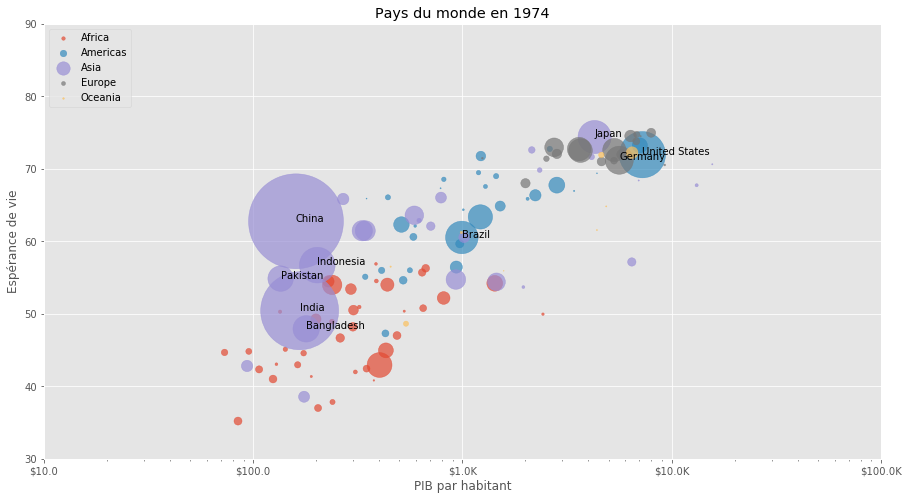

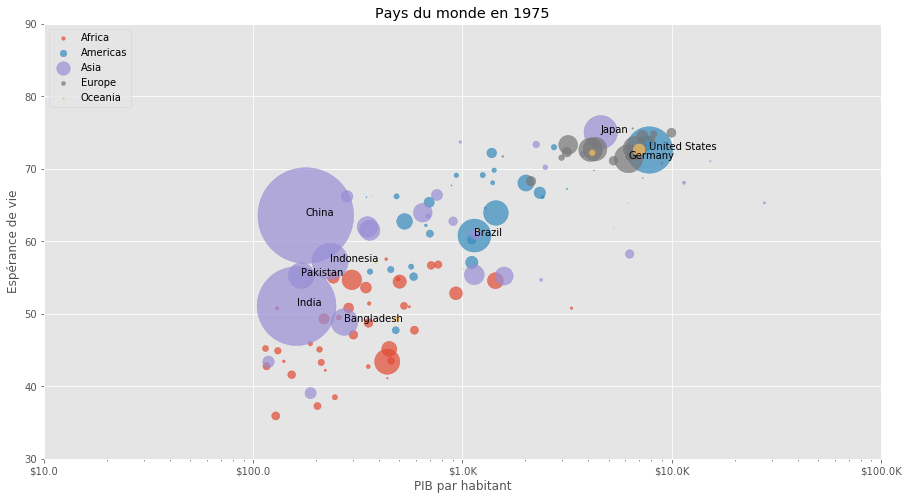

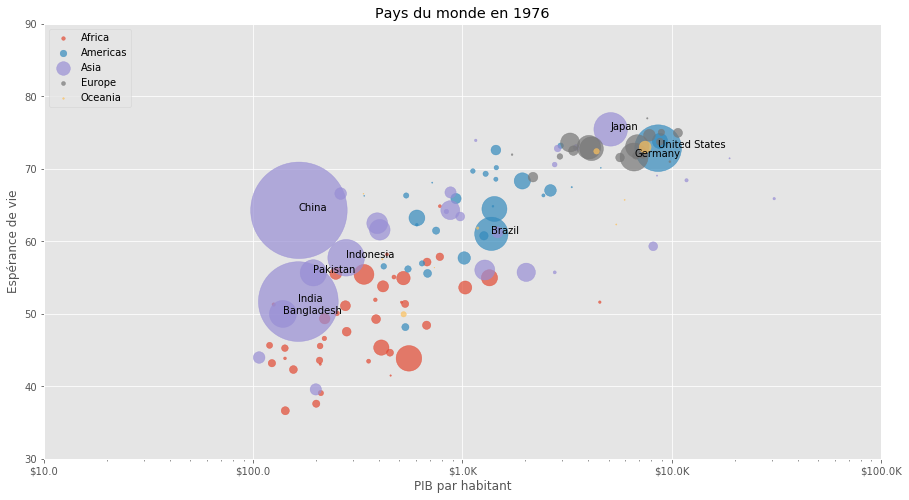

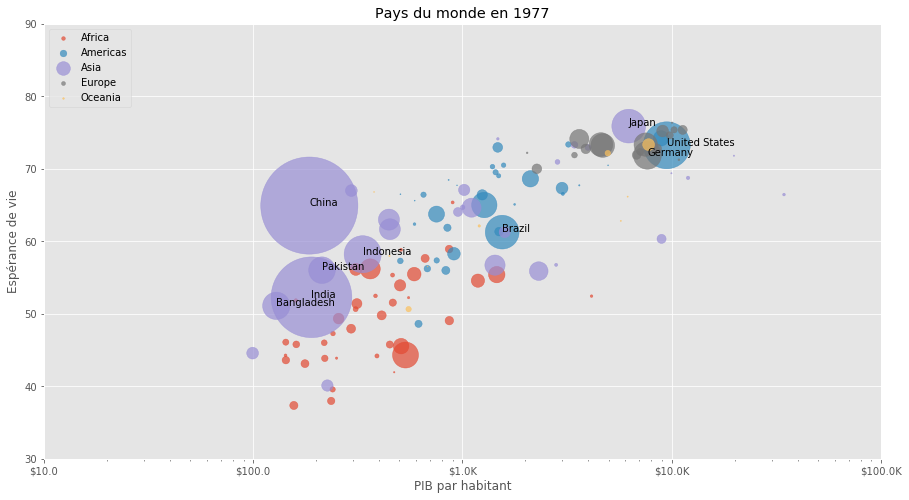

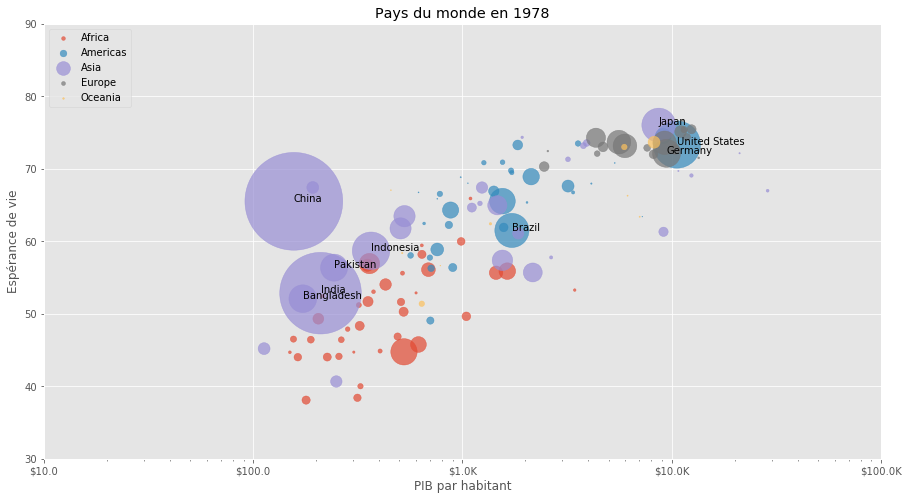

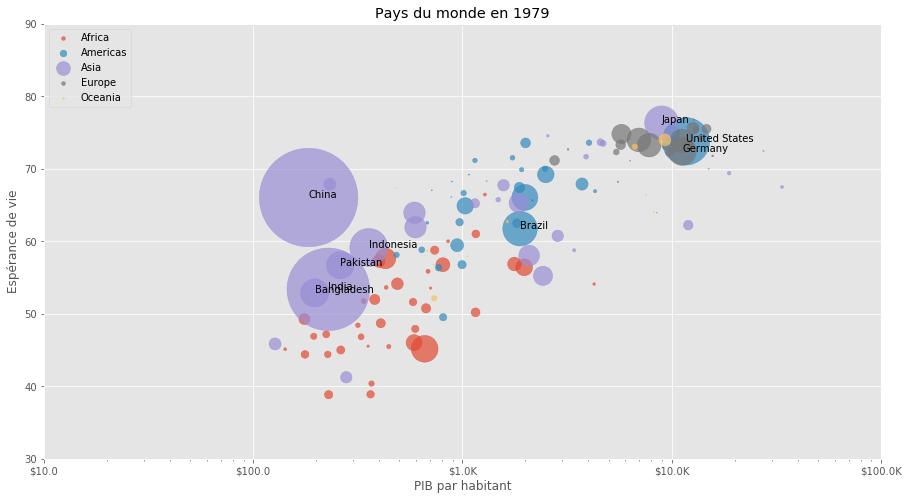

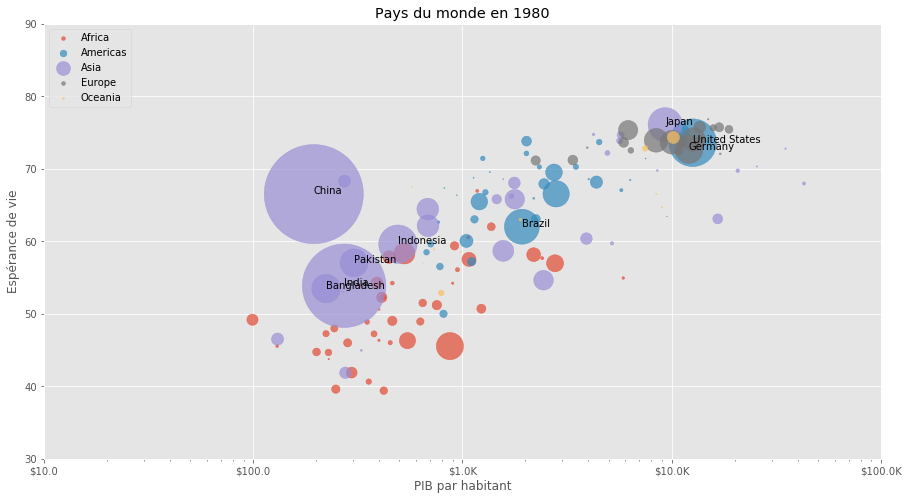

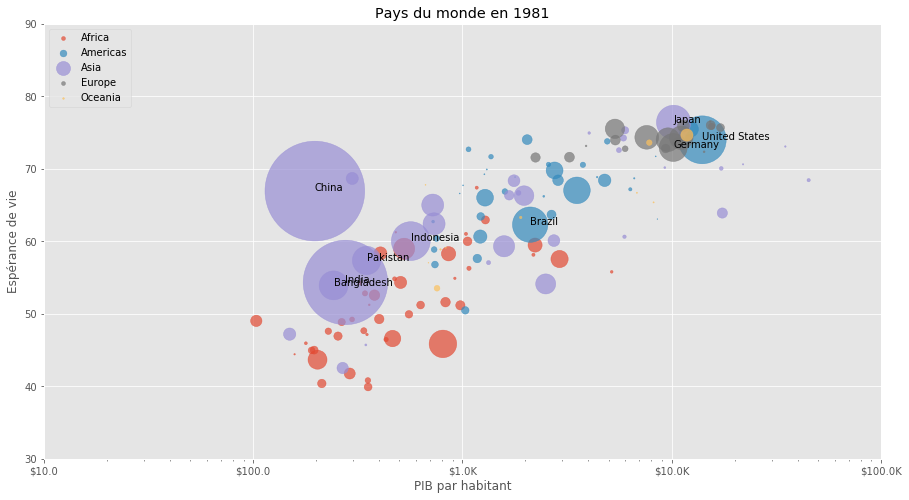

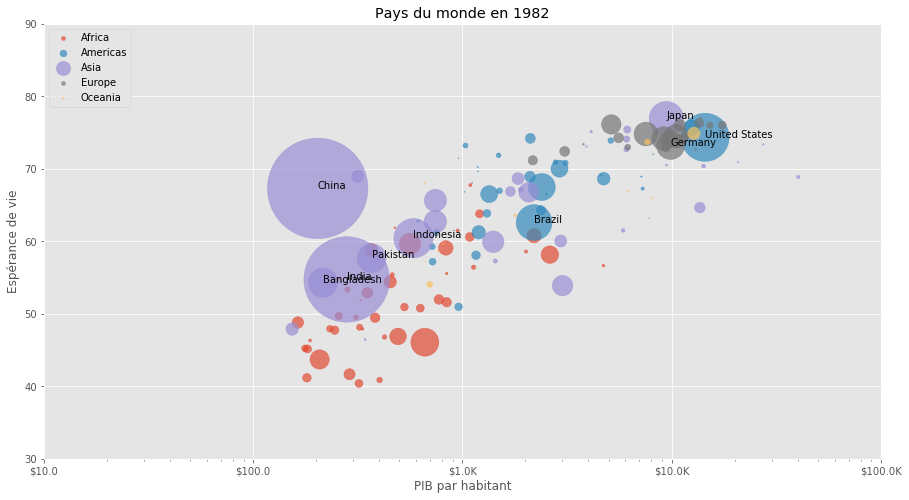

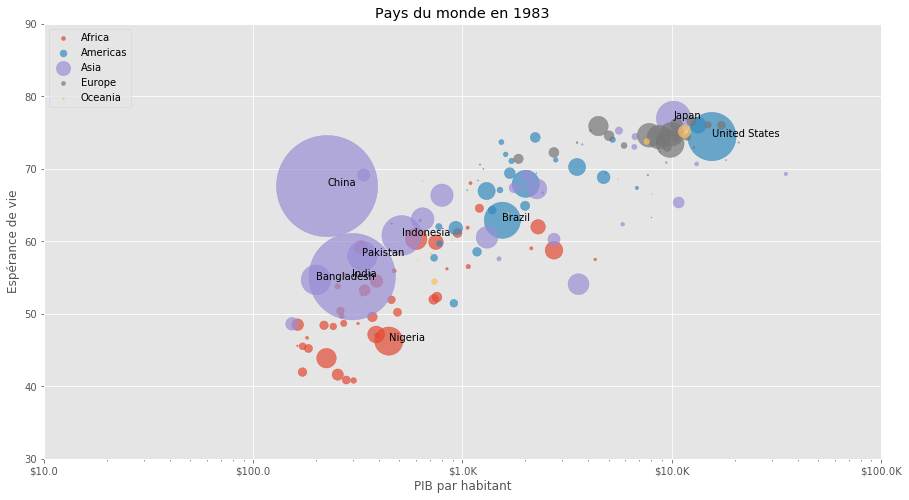

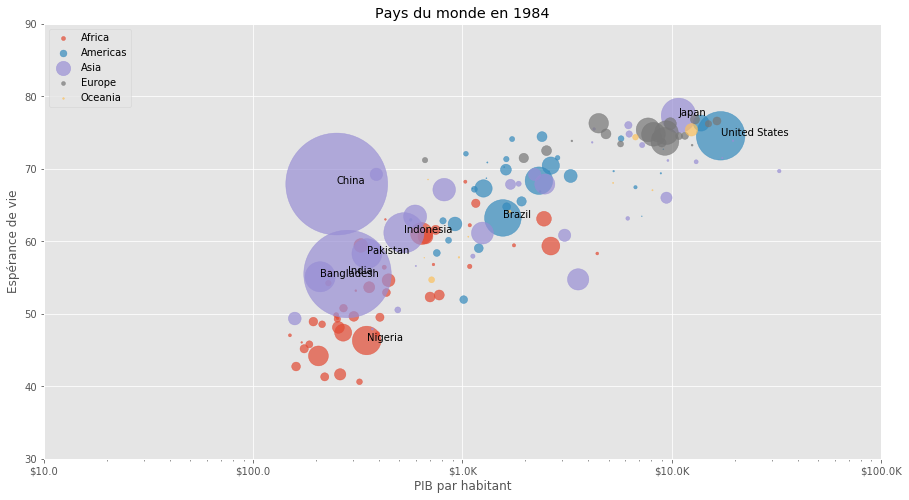

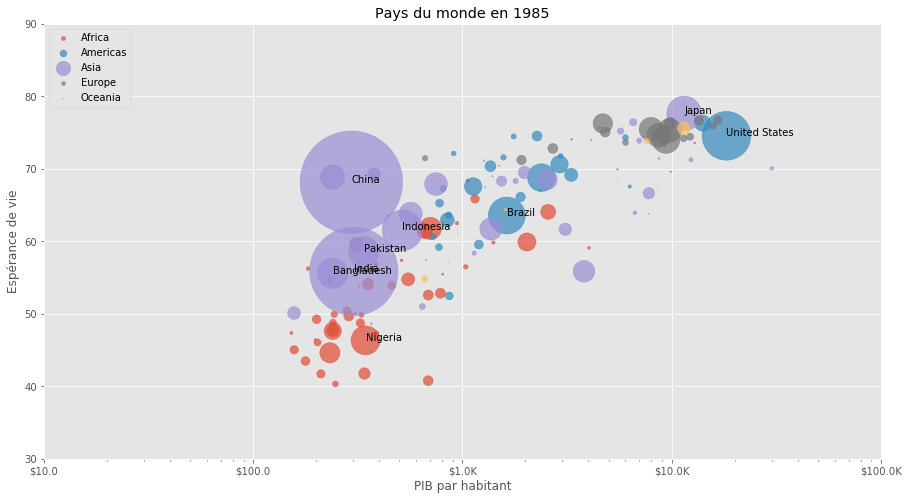

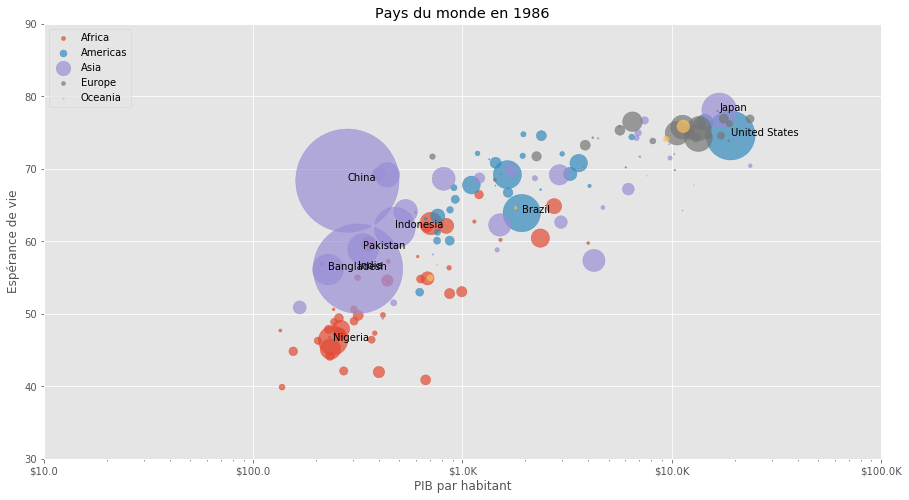

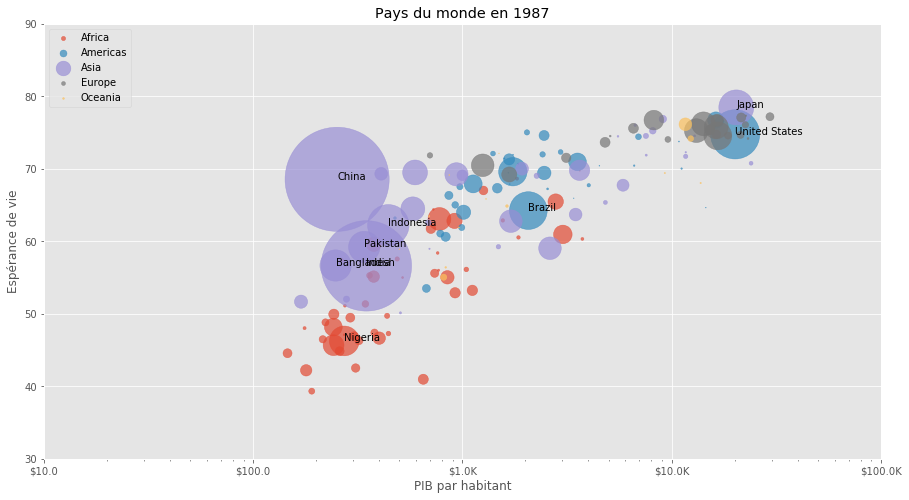

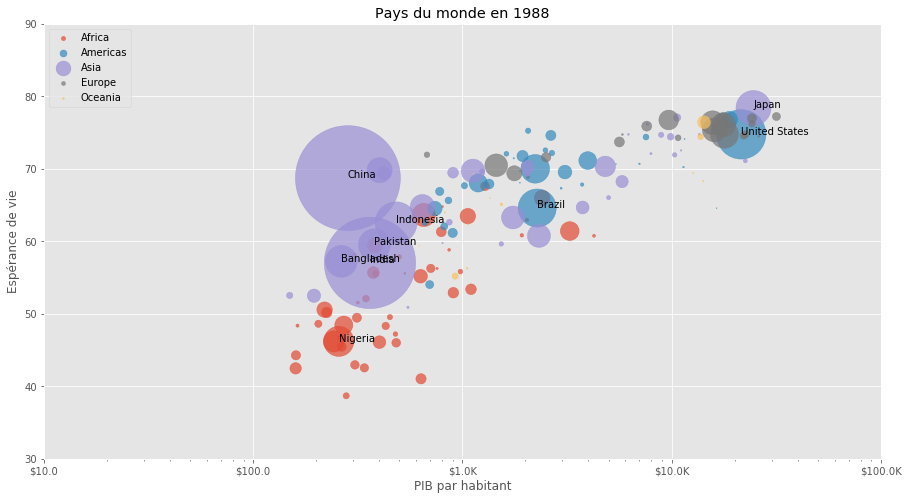

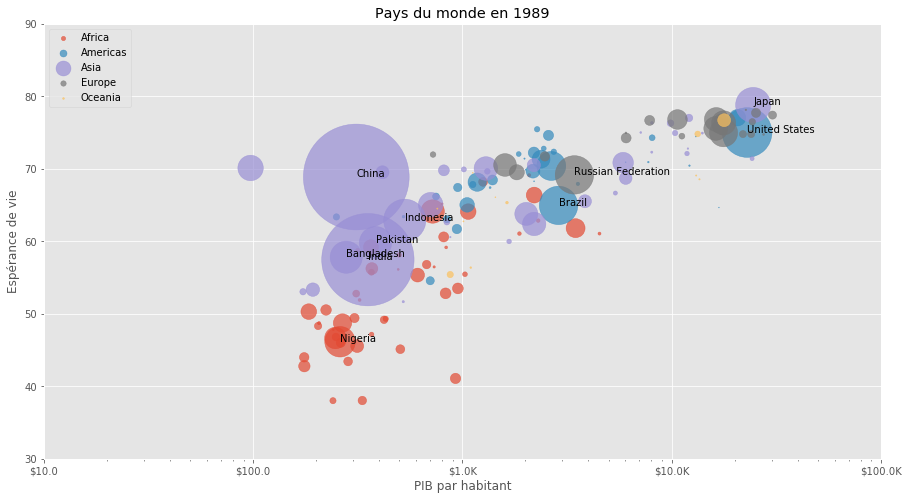

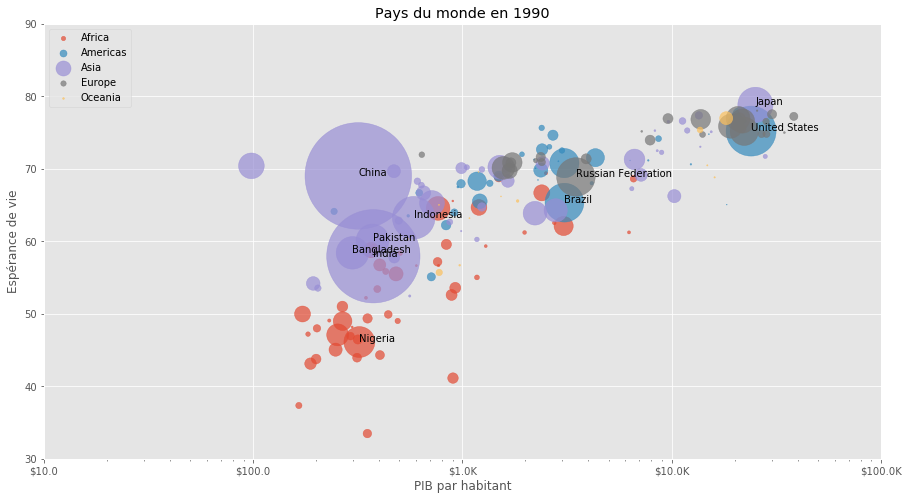

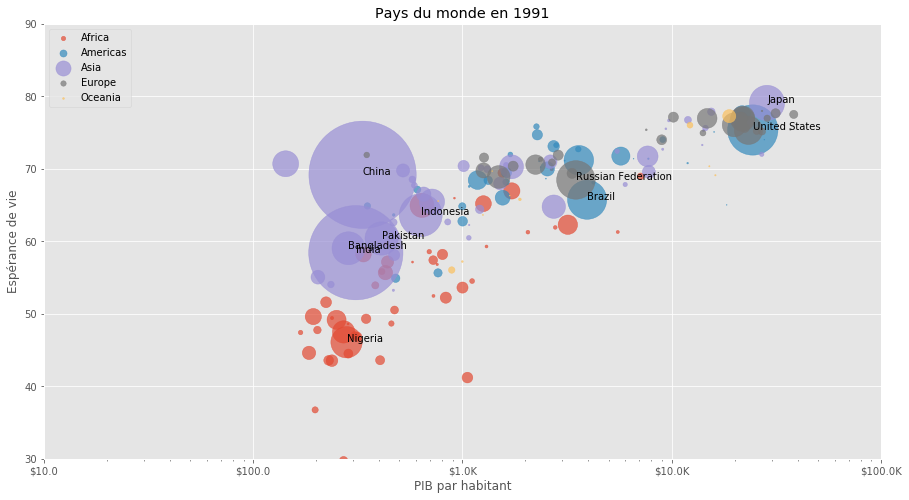

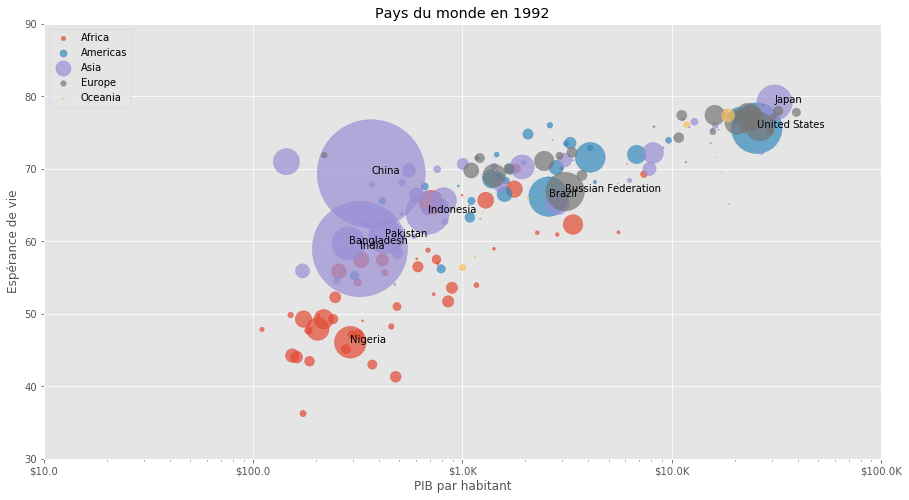

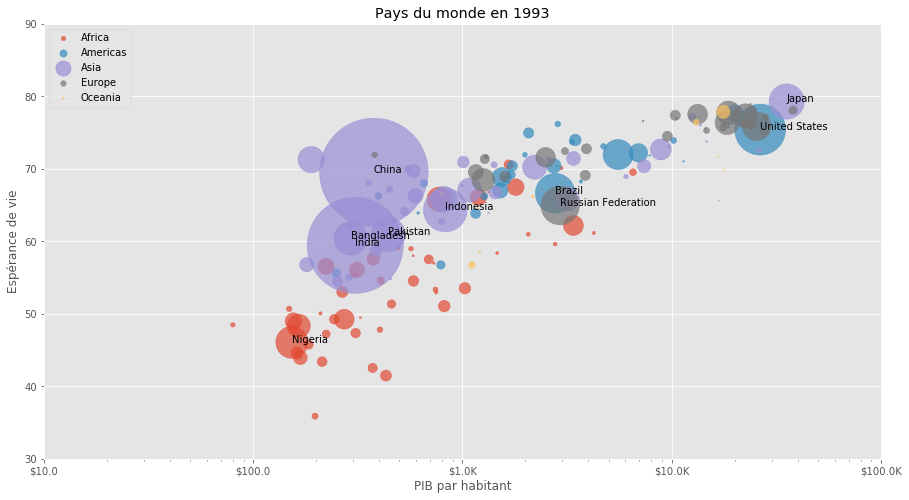

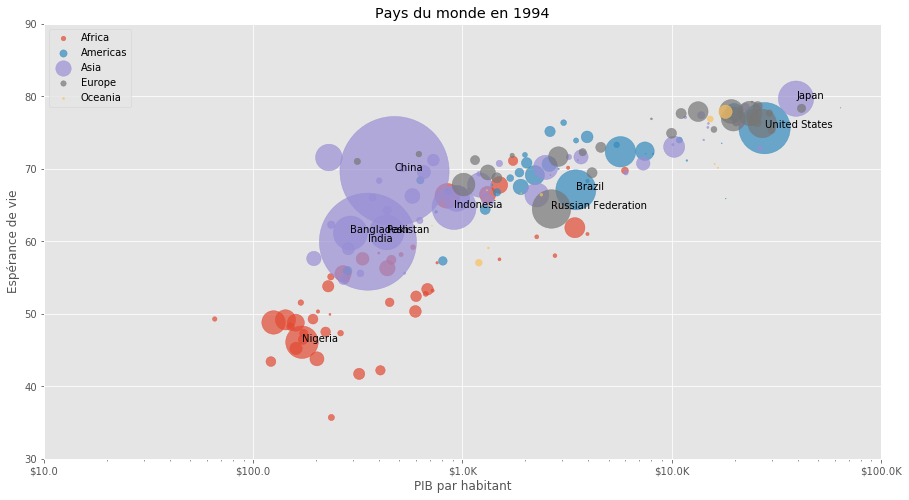

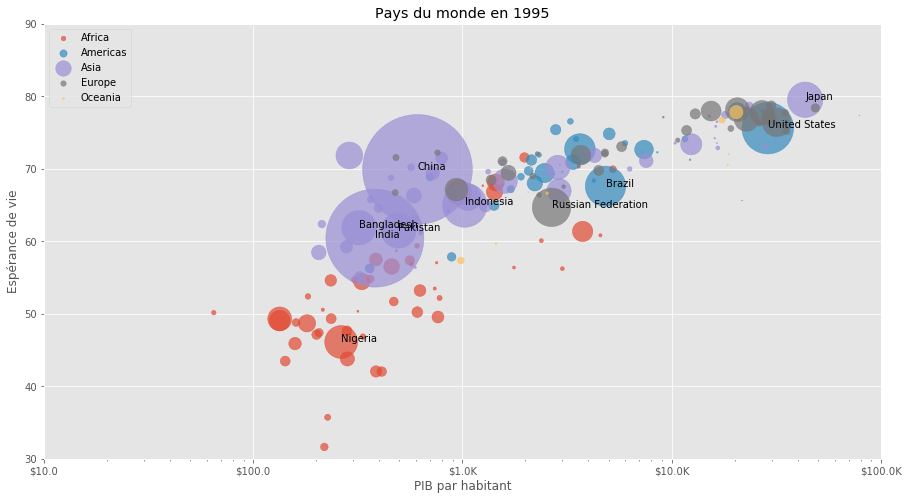

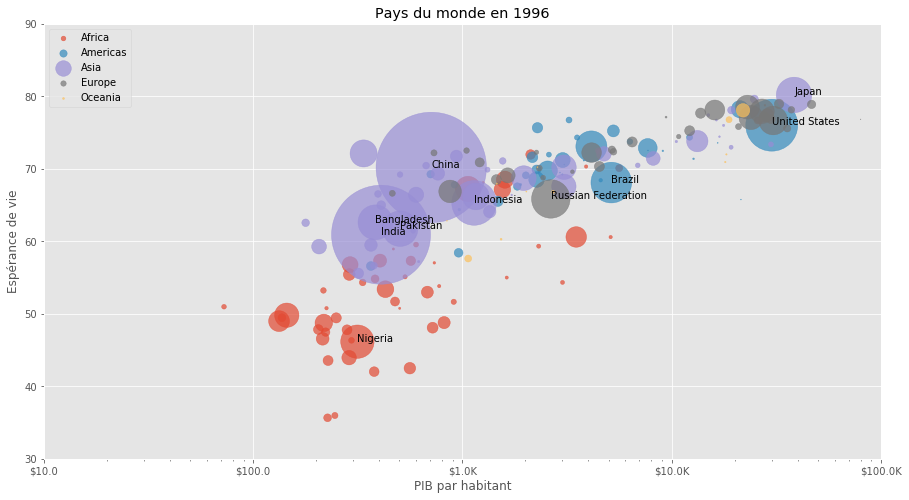

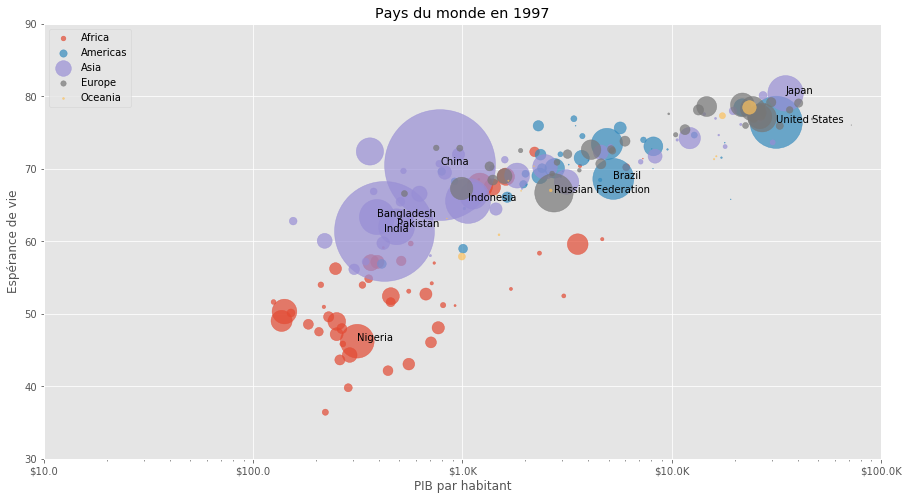

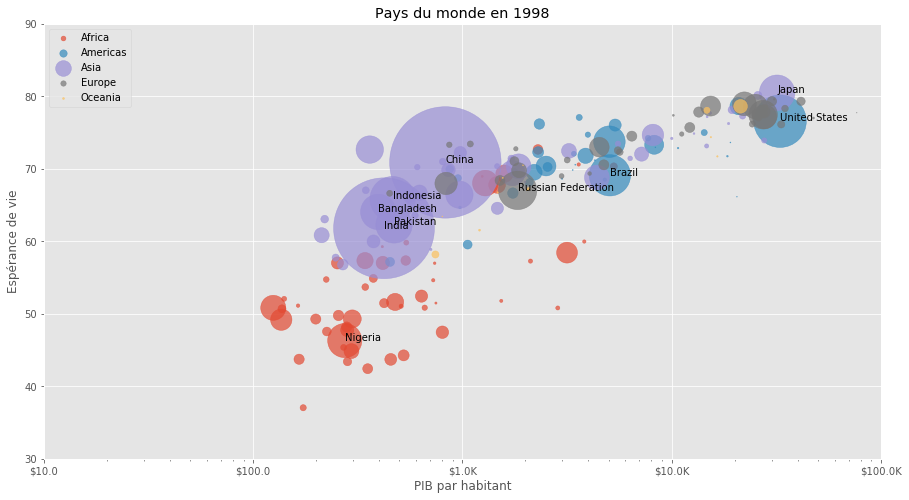

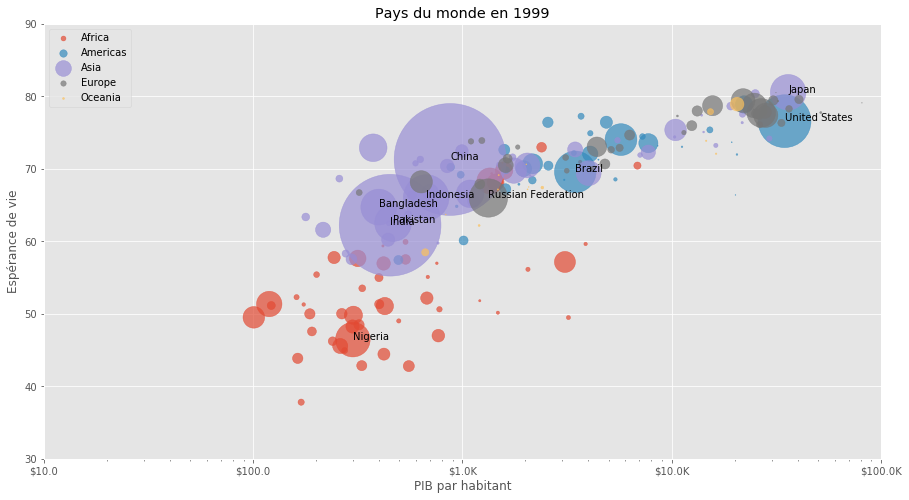

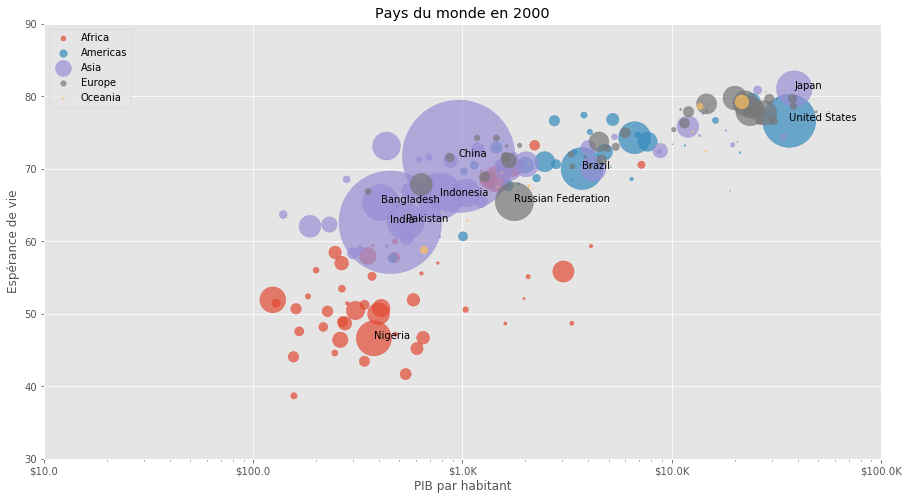

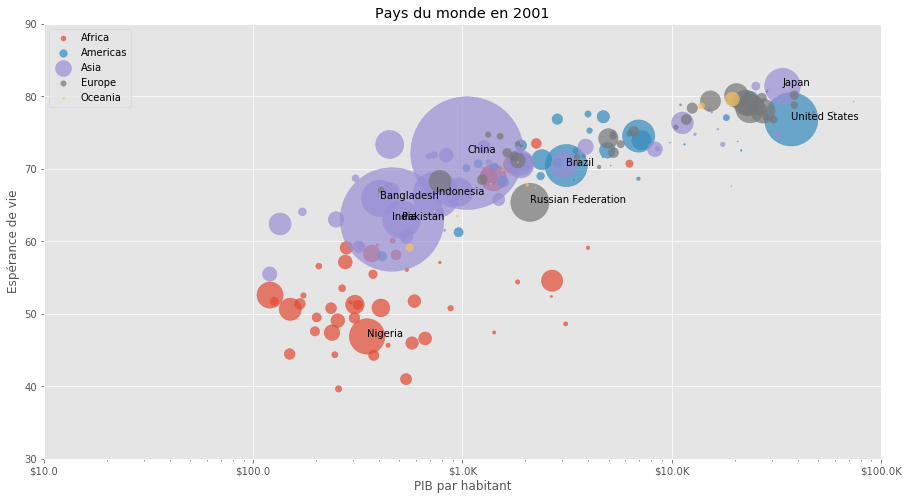

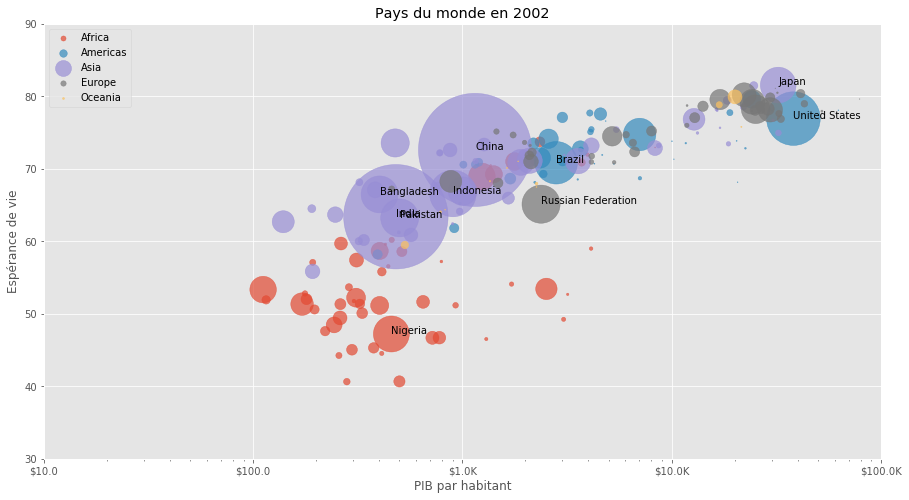

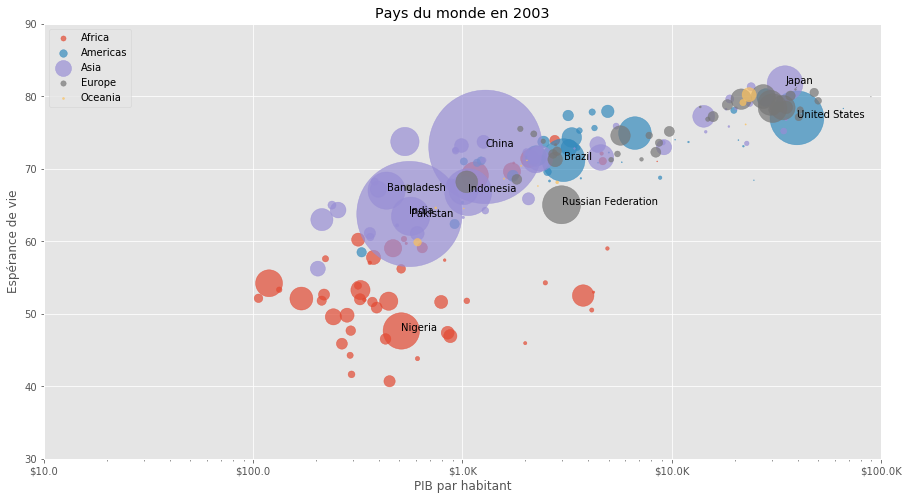

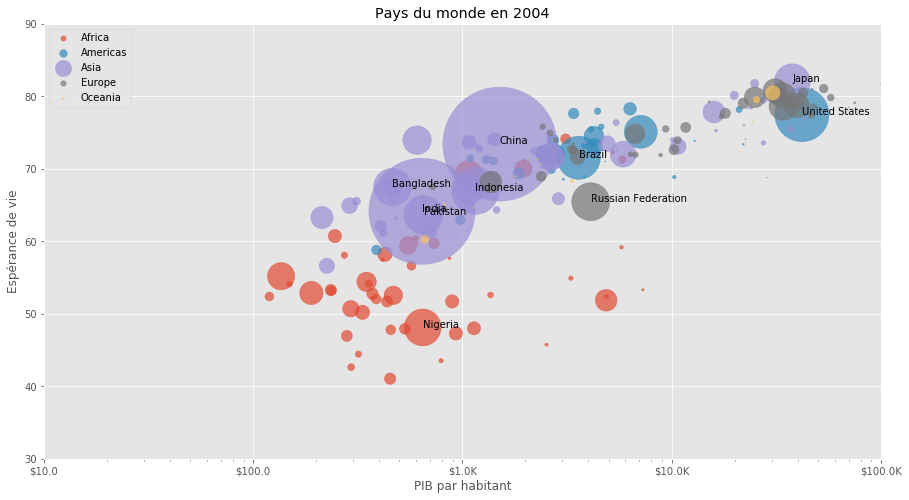

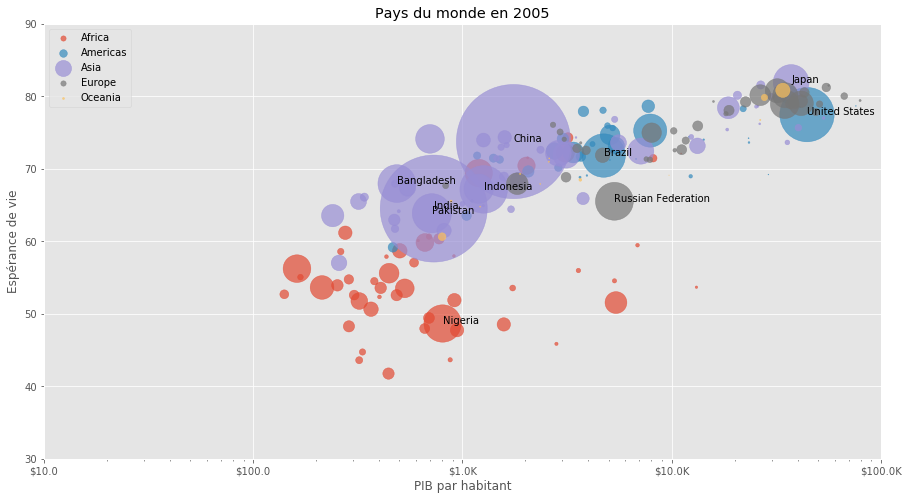

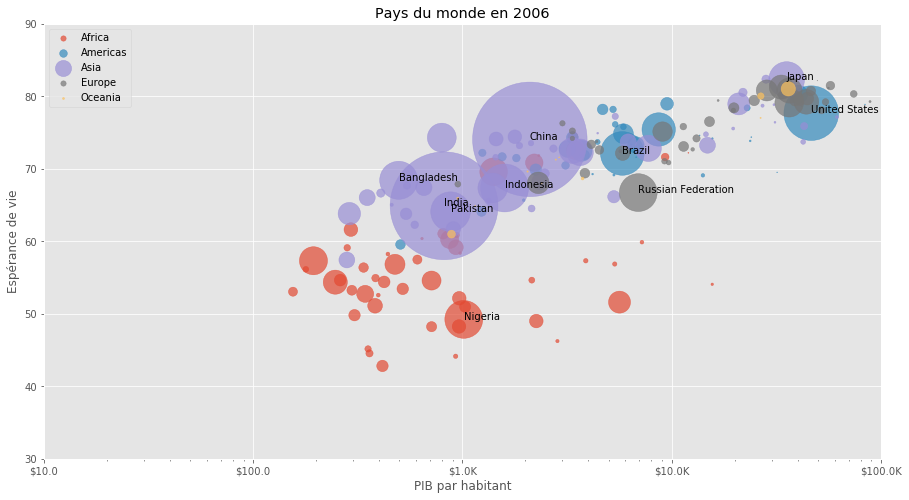

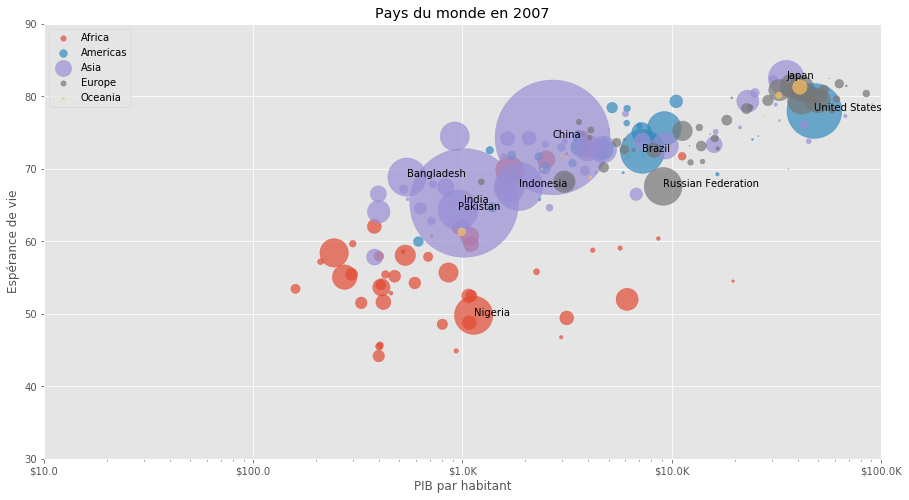

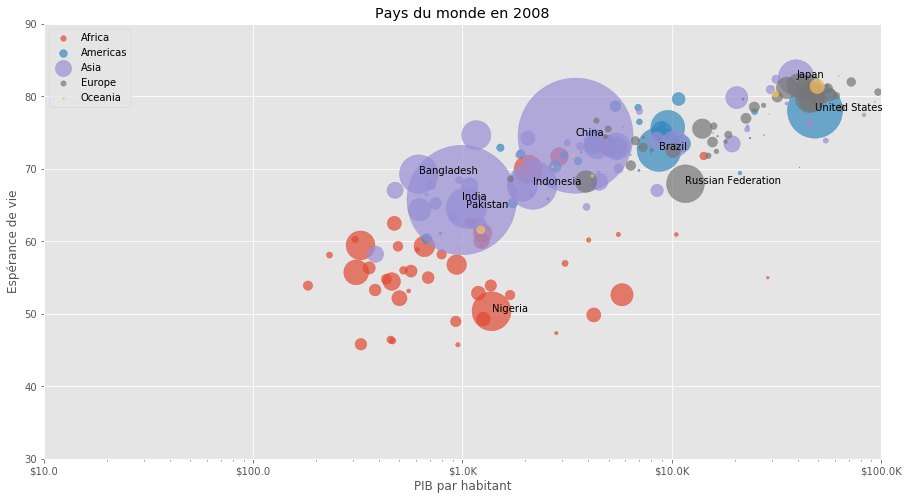

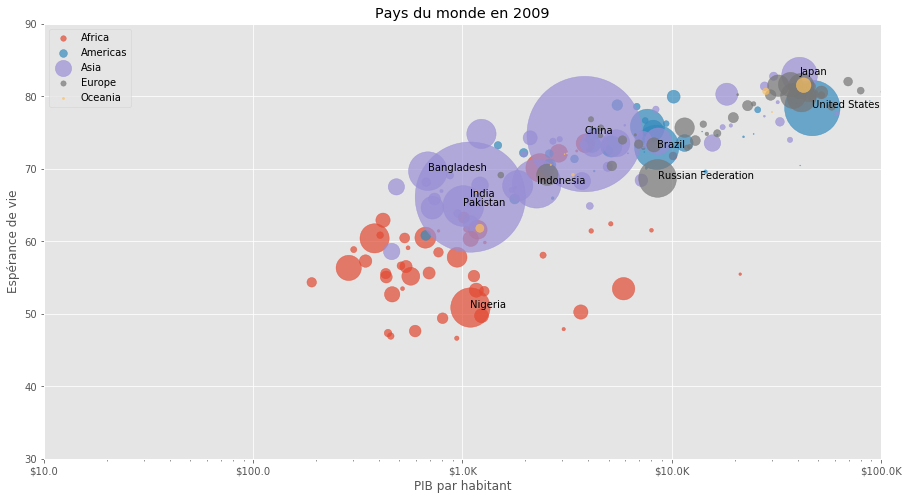

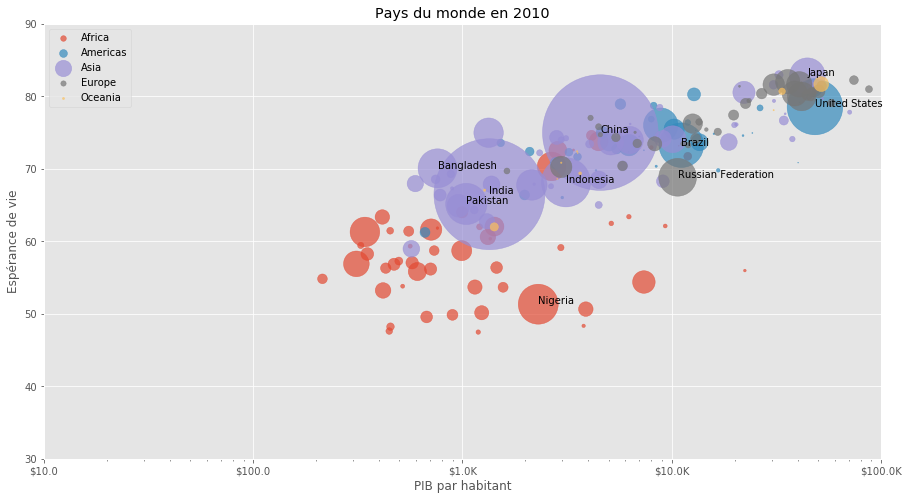

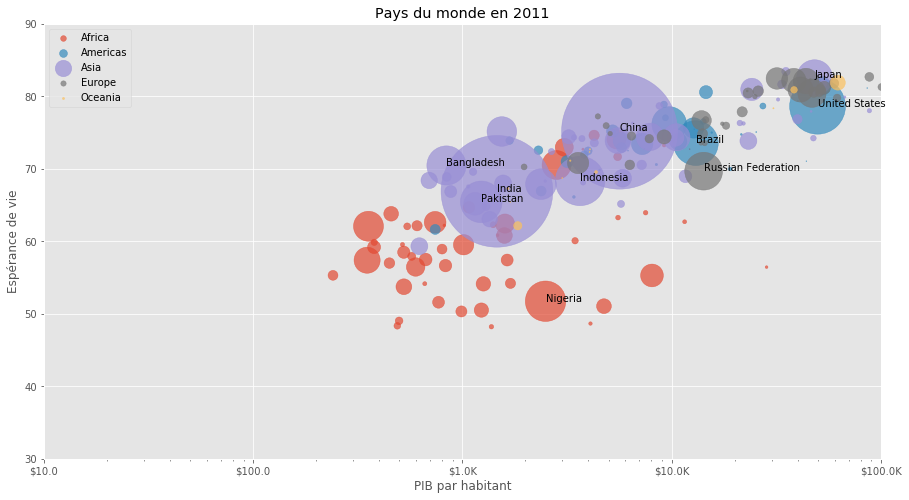

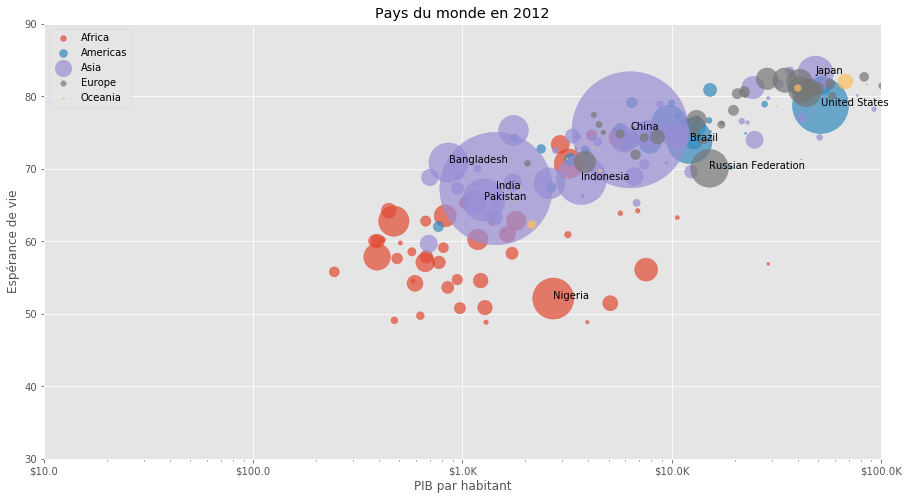

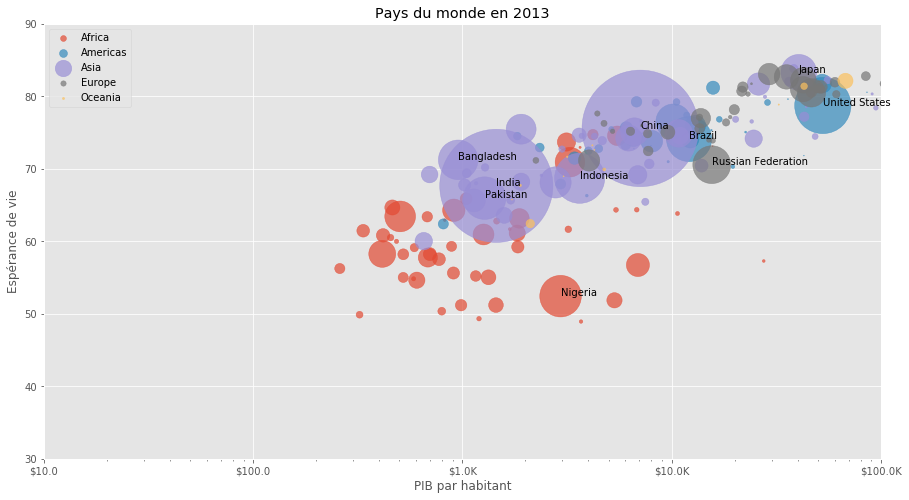

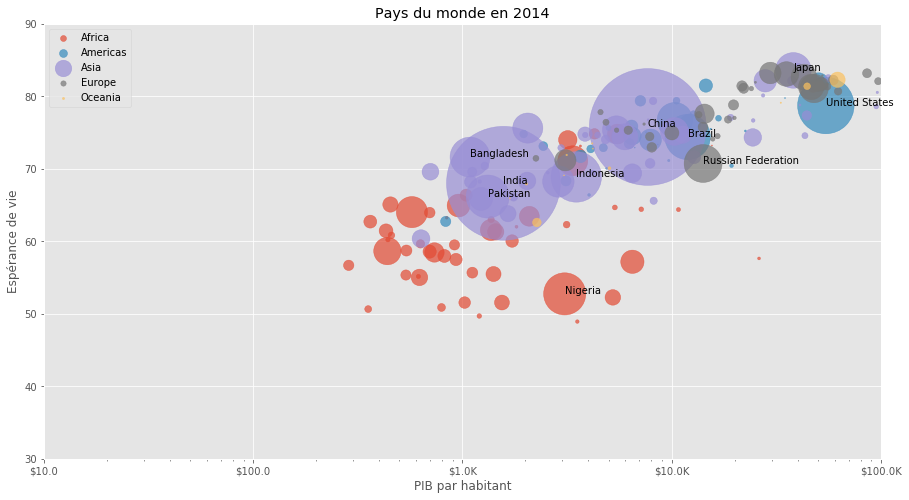

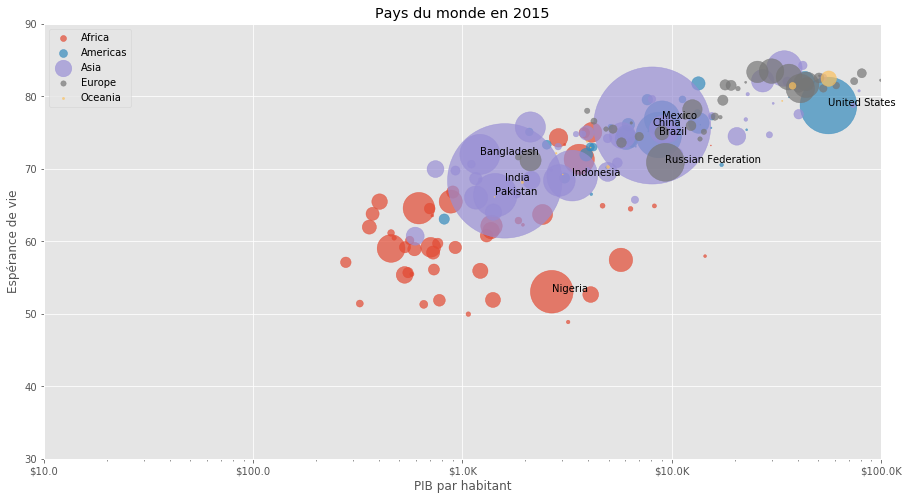

In [156]:
for year in range(1960, 2016):
    pays_du_monde(year, save=True)

NameError: name 'df_pop' is not defined